# Cost Function
* A cost function is an important parametyer that determines how well a machine learning model performs for a given dataset.
* Cost function is a measure of how wrong the model is in estimating the relationship between X(input) and Y(output) parameter.
* Types of cost function :-
    * Regression Cost Function
    * Classification Cost Function

### 1. Regression Cost Function
* Regression models are used to make a prediction for the continuous variables.
    * MSE (mean square error)
    * RMSE (root mean square error)
    * MAE (mean absolute error)
    * R² Accuracy


### 2. Classification Cost Function
* It is further devided into two parts
1. Binary classfication Cost Functions:
    * Classification models are used to make predictions of catyegorical variables, such as predictions for 0 or 1. example-cat or dog etc.
2. Multi-class Classification Cost Function
    * A mutli-class Classification cost function is used in the classification problems for which instances are allocated to one of more than two classes.
        * Binary Cross Entropy Cost Function or Log Loss Function

### Regularization
* This is a form of regression, that constrains/regularizes or shrinks the coefficient estimates towards zero.
* This technique discourages learning a more comples or flexible model, so as to avoid the risk of overfitting.
* Regularization can achieve this motive with 2 techniques:
    * Lasoo Regularization / L1
    * Ridge Regularization / L2

##### 1. Lasoo Regularization (L1)
* This is a regularization technique used in feature selection using a shrinkage method also referred to as the penalized regression method.
* Lasso regression magnitude of coefficients can be exactly zero.
* Cost function = Loss + ⋋ ∑∣∣w∣∣
    * Loss = sum of sqaured residual
    * ⋋ = penalty
    * w = slope of the curve

##### 2. Ridge Regualarization (L2)
* Ridge regression, also known as L2 regularization, is an extension to linear regression that introduces a regularization term to reduce model complexity and help prevent overfitting.
* Ridge regression is working value/magnitude of coefficients is almost equal to zero.
* Cost function = Loss + ⋋ ∑∣∣w∣∣²
    * Loss = sum of sqaured residual
    * ⋋ = penalty
    * w = slope of the curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [2]:
df = pd.read_csv('../../dataset/house_price.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [4]:
df=df.select_dtypes(['int64','float64'])

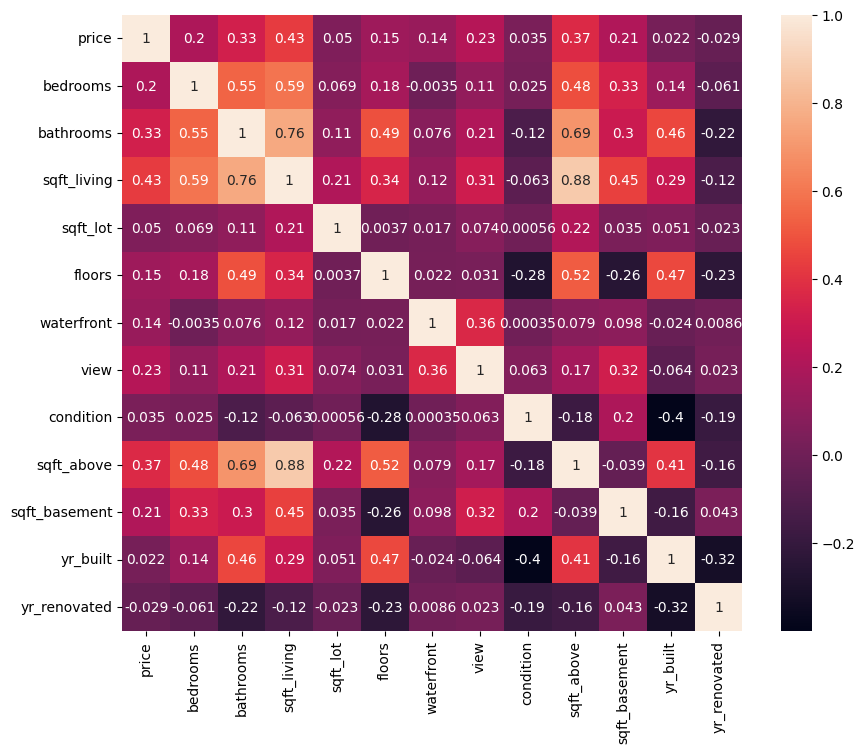

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [37]:
x = df.drop(columns=['price'])
y = df['price']
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [38]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Linear Regression

In [49]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
lr.score(x_test,y_test)

0.03228305125748221

In [51]:
lr.coef_

array([-5.86127047e+04,  2.86080048e+04,  2.00044078e+16, -1.84668414e+04,
        3.75708793e+04,  3.22793609e+04,  3.48349413e+04,  1.98653099e+04,
       -1.79059966e+16, -9.63945569e+15, -7.63759932e+04,  8.08810424e+03])

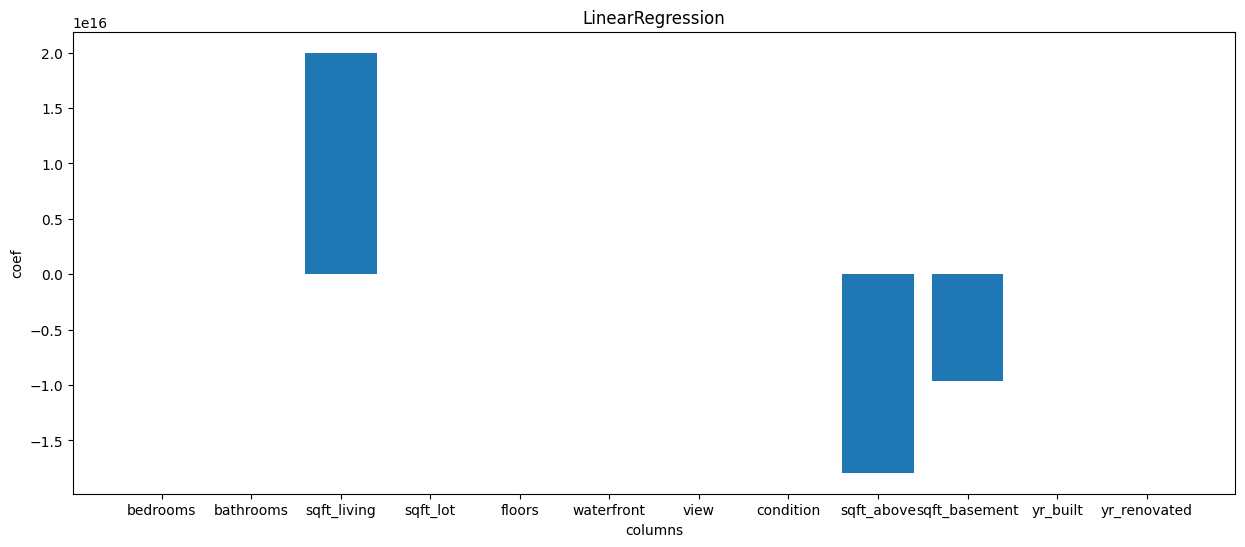

In [52]:
plt.figure(figsize=(15,6))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

### Lasso

In [53]:
la = Lasso(alpha=0.001)
la.fit(x_train,y_train)

f:\Windows 10 data\Python Files\Data Science\py_virtual_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [54]:
la.score(x_test,y_test)

0.03228385614710594

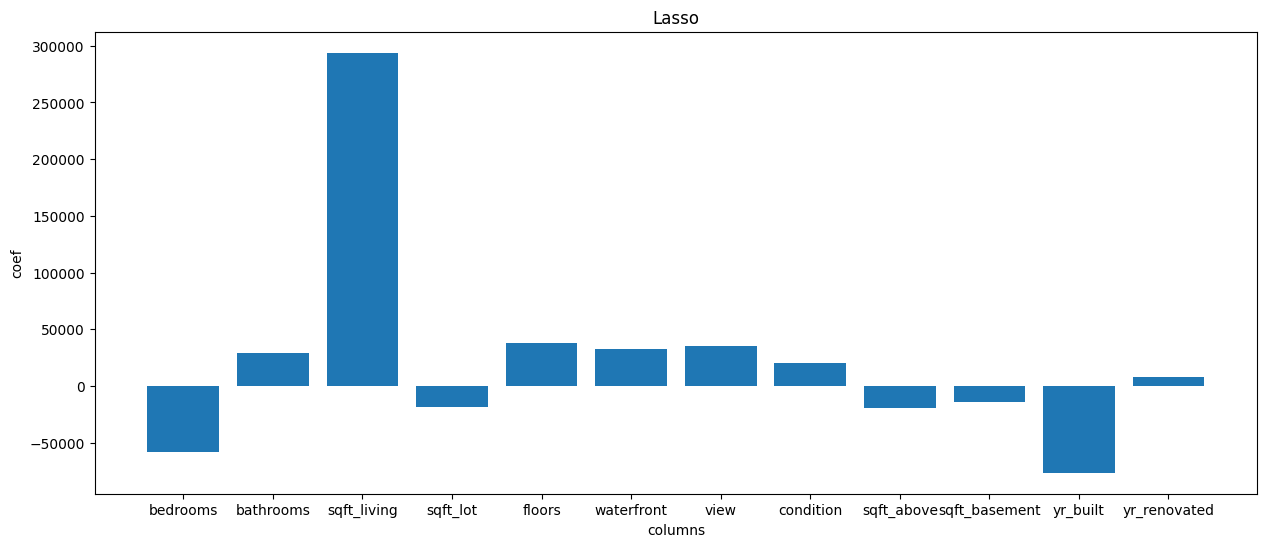

In [55]:
plt.figure(figsize=(15,6))
plt.bar(x.columns,la.coef_)
plt.title('Lasso')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

### Ridge

In [56]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)

Ridge(alpha=10)

In [57]:
ri.score(x_test,y_test)

0.03240199417134748

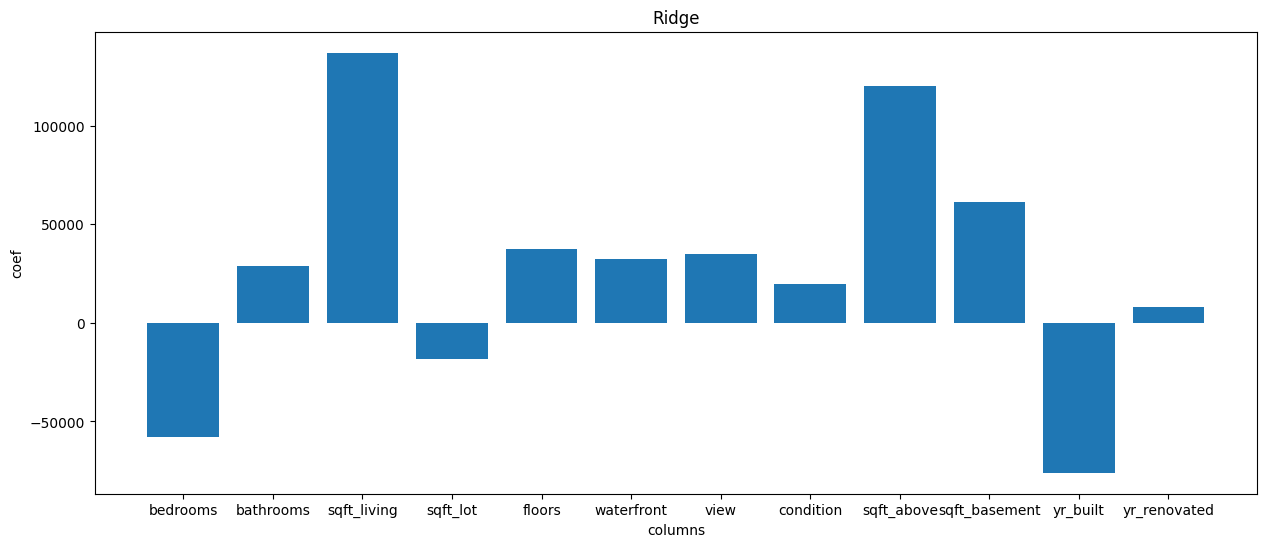

In [58]:
plt.figure(figsize=(15,6))
plt.bar(x.columns,ri.coef_)
plt.title('Ridge')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

986922588415.1719
210909.47574045937
993439.7759377123


In [61]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

986921767551.4349
210908.17337269575
993439.3627954526


In [62]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

986801284919.7871
210815.94787385664
993378.7217973752


In [63]:
pd.DataFrame({'col_name':x.columns,'LinearRegression':lr.coef_,'Lasso':la.coef_,'Ridge':ri.coef_})

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-5.861270e+04,-58612.023264,-58006.052993
1,bathrooms,2.860800e+04,28620.912039,28878.686087
2,sqft_living,2.000441e+16,293884.063279,137085.109644
3,sqft_lot,-1.846684e+04,-18457.454395,-18298.877275
4,floors,3.757088e+04,37581.760735,37445.130830
5,waterfront,3.227936e+04,32277.528786,32264.182806
6,view,3.483494e+04,34834.371013,34968.321859
7,condition,1.986531e+04,19864.739319,19870.905664
8,sqft_above,-1.790600e+16,-19166.092316,120223.632684
9,sqft_basement,-9.639456e+15,-13878.185725,61163.461025
